# BBC News Articles

## Task 1: Exploratory Data Analytics
###### (a) Load the dataset and construct a feature vector for each article in the. You need to report the number of articles, and the number of extracted features. Show 5 example articles with their extracted features using a dataframe.
###### (b) Conduct term frequency analysis and report three plots: (i) top-50 term frequency distribution across the entire dataset, (ii) term frequency distribution for respective class of articles, and (iii) class distribution.

Setup

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import random

Import Data

In [3]:
df = pd.read_csv("train.csv", skiprows=0, header=0, na_values= "", dtype=str)
df.head()

## Load Test Data ##
testdf = pd.read_csv("test.csv", skiprows=0, header=0, na_values= "", dtype=str)
testdf.head()

,ArticleId,Text,Category
0,1821,johnny denise lose passport johnny vaughan den...,entertainment
1,522,bt offers free net phone calls bt offering cus...,tech
2,636,power people says hp digital revolution focuse...,tech
3,170,stars gear bafta ceremony film stars across gl...,entertainment
4,85,controversial film tops festival controversial...,entertainment


Vectorize Data

In [4]:
articles_text = df["Text"].to_numpy()

#select 5 random articles for task 1
random_sample = random.sample(list(articles_text), 5)

## APPROACH ONE ##
vectorizer1 = CountVectorizer()
vectorizer1.fit(articles_text)

vectorizer1_sample = CountVectorizer()
vectorizer1_sample.fit(random_sample)

#Summary
#print(f'vector vocabulary - {vectorizer.vocabulary_}\n')

# encode document
vector1 = vectorizer1.transform(articles_text)
vector1_sample = vectorizer1_sample.transform(random_sample)

# summarize encoded vector
print("Method 1")
print(f'article vector\n {vector1.toarray()}')
print(f'\narticle vector (5 articles)\n {vector1_sample.toarray()}')

## APPROACH TWO ##
vectorizer2 = TfidfVectorizer()
vectorizer2.fit(articles_text)

vectorizer2_sample = TfidfVectorizer()
vectorizer2_sample.fit(random_sample)

#Summary
#print(f'vector vocabulary - {vectorizer2.vocabulary_}\n')

# encode document
vector2 = vectorizer2.fit_transform(articles_text)
vector2_sample = vectorizer2_sample.transform(random_sample)

# summarize encoded vector
print('\n', "Method 2")
print(f'article vector\n {vector2.toarray()}')
print(f'\narticle vector (5 articles)\n {vector2_sample.toarray()}')
print('\nArticles:', vector2.shape[0], ', Extracted Features:', vector2.shape[1])

# for my task
## APPROACH ONE ##
vectorizer1 = CountVectorizer()
vectorizer1.fit(articles_text)

vectorizer1_sample = CountVectorizer()
vectorizer1_sample.fit(random_sample)

# encode document
vector1 = vectorizer1.transform(articles_text)
vector1 = vector1.toarray()
v1_names = vectorizer1.get_feature_names_out()

vector1_sample = vectorizer1_sample.transform(random_sample)
vector1_sample = vector1_sample.toarray()
v1_sample_names = vectorizer1_sample.get_feature_names_out()

#map sample to feature names
v1_sample_df = pd.DataFrame(data=zip(v1_sample_names, vector1_sample[0], vector1_sample[1], vector1_sample[2], vector1_sample[3], vector1_sample[4], sum([vector1_sample[0], vector1_sample[1], vector1_sample[2], vector1_sample[3], vector1_sample[4]])), columns=['Features', 'Article 1', 'Article 2', 'Article 3', 'Article 4', 'Article 5', 'Total'])

v1_df_emily = pd.DataFrame(data=vector1, columns = v1_names)

Method 1
article vector
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

article vector (5 articles)
 [[0 0 0 ... 0 1 1]
 [0 0 0 ... 1 0 0]
 [1 1 0 ... 0 0 0]
 [2 0 1 ... 0 0 0]
 [1 0 0 ... 1 0 0]]

 Method 2
article vector
 [[0.         0.02011467 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

article vector (5 articles)
 [[0.         0.         0.         ... 0.         0.04358918 0.04358918]
 [0.         0.         0.         ... 0.06542103 0.         0.        ]
 [0.04137201 0.06177585 0.         ... 0.         0.         0.        ]
 [0.04733

## Task 2: Classification Models Learning

### Logistic Regression
###### Train your logistic regression classifier with L2-regularization. Consider different values of the regularization term λ. Describe the effect of the regularization parameter λ on the outcome in terms of bias and variance. Report the plot generated for specific λ values with training loss on the y-axis versus λ on the x-axis to support your claim.

In [5]:
# Matthew Young
# Logistic Regression Classifier

# Import Libraries for LR, metrics, and graph plotting
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from matplotlib import pyplot as plt

traindf = df
text_transformer = TfidfVectorizer()
X_train_text = text_transformer.fit_transform(traindf['Text'])
X_test_text = text_transformer.transform(testdf['Text'])

y = traindf['Category']  #Target Variable of Category being Tech or Entertainment

## L2 Regularization LR Classifer
logreg = LogisticRegression(penalty='l2', solver='lbfgs', C=1, multi_class='multinomial')
logreg.fit(X_train_text, y)

logreg_prediction = logreg.predict(X_test_text)
logreg_prediction_prob = logreg.predict_proba(X_test_text)

# Logistic Regression Summary
logreg_predict_df = pd.DataFrame(data=logreg_prediction, columns=['Prediction'])
logreg_prediction_prob_df = pd.DataFrame(data=logreg_prediction_prob, columns=['Entertainment', 'Tech'])
logreg_score = logreg.score(X_test_text, testdf['Category'])

print('\n', "Logistic Regression Predictions")
print(logreg_predict_df)
print('\n', "Logistic Regression Prediction Probabilities")
print(logreg_prediction_prob_df)
print('\n', "Logistic Regression Accuracy")
print(logreg_score)



 Logistic Regression Predictions
        Prediction
0    entertainment
1             tech
2             tech
3    entertainment
4    entertainment
..             ...
101  entertainment
102  entertainment
103  entertainment
104           tech
105           tech

[106 rows x 1 columns]

 Logistic Regression Prediction Probabilities
     Entertainment      Tech
0         0.658963  0.341037
1         0.112167  0.887833
2         0.154608  0.845392
3         0.941835  0.058165
4         0.943972  0.056028
..             ...       ...
101       0.597341  0.402659
102       0.792064  0.207936
103       0.816202  0.183798
104       0.137007  0.862993
105       0.157883  0.842117

[106 rows x 2 columns]

 Logistic Regression Accuracy
0.9905660377358491


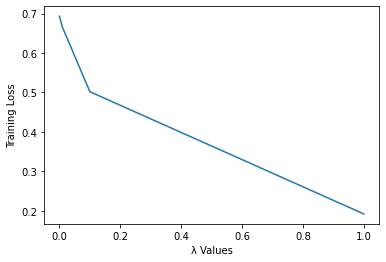

In [6]:
# LR Plot
# X-Axis: Lambda
# Y-Axis: Training/Log Loss

lambda_values = [0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
training_loss = []
for _lambda in lambda_values:
    logreg = LogisticRegression(penalty='l2', solver='lbfgs', C=_lambda, multi_class='multinomial')
    logreg.fit(X_train_text, y)
    training_loss.append(log_loss(y, logreg.predict_proba(X_train_text)))

plt.plot(lambda_values, training_loss)
plt.xlabel('λ Values')
plt.ylabel('Training Loss')
plt.show()


Regularization is the technique used to reduce error by fitting a function appropriately on the given training set and avoid under/overfitting.

The effect of the regularization parameter λ on the outcome in terms of bias and variance is that as the lambda parameter increases, training error increases. Regularization forces parameters to be close to 0 which causes the variance to decrease, but as we are allowing less flexibility, the model moves away from the true values, thus increasing bias.

The plot shows the inverse of this as the C parameter in the LogisticRegression class is the inverse of regularization

### Naive Bayes
###### Train a Naive Bayes classifier using all articles features. Report the (i) top-20 most identifiable words that are most likely to occur in the articles over two classes using your NB classifier, and (ii) the top-20 words that maximize the following quantity 𝑃(𝑋𝑤=1|𝑌=𝑦)/𝑃(𝑋𝑤=1|𝑌≠𝑦). Which list of words describe the two classes better? Briefly explain your reasoning. - She's going to change some stuff and make an announcement


In [7]:
# Emily

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# X_train is vectorised features, Y_train is the classes of each row / target variable
X_train = vector2.toarray()
target_col = df["Category"]
Y_train = target_col.to_numpy()

NB_clf = MultinomialNB()
NB_clf.fit(X_train, Y_train)

# Training accuracy
y_train_pred = NB_clf.predict(X_train)
train_acc = metrics.accuracy_score(Y_train, y_train_pred)
# or
train_acc_2 = NB_clf.score(X_train, Y_train)

print(train_acc, "or", train_acc_2)

# Testing accuracy
#Y_pred = NB_clf.predict(X_test)
#print("Test Accuracy:",metrics.accuracy_score(Y_Test, Y_pred))





0.9953271028037384 or 0.9953271028037384


### (i)

In [8]:
# Df for grouping - vectorsied df with target df 
count_df = pd.concat([v1_df_emily,target_col], axis=1)

# Grouped data by category
grouped = count_df.groupby(count_df.Category)

# Split data into df of each category
# dropped category column for sum
tech_df = grouped.get_group("tech")
tech_df = tech_df.drop("Category", axis=1)

ent_df = grouped.get_group("entertainment")
ent_df = ent_df.drop("Category", axis=1)

# Summed each colum in each df
sum_tech_series = tech_df.sum()
sum_ent_series = ent_df.sum()

# Sorting each series to get top 20
sorted_tech = sum_tech_series.sort_values(ascending = False)
top_20_tech = sorted_tech[:20]
print("Top 20 Tech:")
print(top_20_tech)

sorted_ent = sum_ent_series.sort_values(ascending = False)
top_20_ent = sorted_ent[:20]
print("Top 20 Entertainment:")
print(top_20_ent)

Top 20 Tech:
said          892
people        507
new           304
mobile        290
mr            288
one           286
also          273
would         267
could         255
technology    247
use           228
users         214
net           214
software      213
games         212
us            210
music         203
many          202
year          201
phone         196
dtype: int64
Top 20 Entertainment:
said      465
film      420
best      324
year      241
music     210
also      206
us        201
new       196
one       193
show      180
first     155
awards    137
tv        130
last      127
uk        127
actor     126
number    124
band      123
mr        120
star      118
dtype: int64


### (ii)

In [9]:
# Will break since some words are in an article multiple times (prob can't be more than one)
#total_tech = tech_df.shape[0]
#prob_word_given_tech = sum_tech_series / total_tech
#total_ent = ent_df.shape[0]
#prob_word_given_ent = sum_ent_series / total_ent

# word in tech / word not in tech - with smoothing
tech_series = (sum_tech_series + 1) / (sum_ent_series + 2)

# word in entertainment / word not in entertainment - with smoothing
ent_series = (sum_ent_series + 1) / (sum_tech_series + 2)

# Sorting each series to get top 20
sorted_tech2 = tech_series.sort_values(ascending = False)
top_20_tech2 = sorted_tech2[:20]
print("Top 20 Tech:")
print(top_20_tech2)

sorted_ent2 = ent_series.sort_values(ascending = False)
top_20_ent2 = sorted_ent2[:20]
print("Top 20 Entertainment:")
print(top_20_ent2)


Top 20 Tech:
users         107.500000
software      107.000000
mobile         97.000000
microsoft      77.500000
broadband      64.500000
virus          61.500000
firms          57.000000
pc             54.500000
net            53.750000
technology     49.600000
phones         48.333333
spam           42.500000
gadget         36.000000
games          35.500000
consumer       34.500000
mobiles        34.000000
gadgets        33.500000
windows        33.500000
machines       33.500000
phone          32.833333
dtype: float64
Top 20 Entertainment:
actress        45.500000
singer         45.000000
oscar          44.000000
band           41.333333
stars          38.000000
album          33.000000
aviator        31.500000
chart          30.000000
nominated      27.500000
rock           26.500000
festival       26.500000
actor          25.400000
nominations    24.000000
charles        23.500000
foxx           22.000000
comedy         21.666667
oscars         21.500000
starring       21.000000


Difference - there is a difference just by looking at them, the top20 words from (ii) look to be more relevent than the top20 words from (i). So (ii) seems to be the better formula.



### NTS - What I need to do
Cut the data df into the two classes
add up word count for each column 
pick ones with the top counts

count of the class i'm looking at / count of class i'm not looking at

df.sum() - give array 
arc sort 

### Soft Value Margin (SVM)
###### Train your SVM classification models on the training dataset. You need to report two surface plots for: (i) the soft-margin linear SVM with your choice of misclassification penalty (𝐶), and (ii) the hard-margin RBF kernel with your choice of kernel width (σ). Explain the impact of penalty 𝐶 on the soft-margin decision boundaries, as well as the kernel hyperparameter on the hard-margin decision boundaries.

In [10]:
# Humza

### Nearest Neighbor
###### Consider the neural network with the following hyperparameters: the initial weights uniformly drawn in range [0,0.1] with learning rate 0.01.
######  ● Train a single hidden layer neural network using the hyperparameters on the training dataset, except for the number of hidden units (x) which should vary among 5, 20, and 40. Run the optimization for 100 epochs each time. Namely, the input layer consists of n features x = [x1, ..., xn]T , the hidden layer has x nodes z = [z1, ..., zx]T , and the output layer is a probability distribution y = [y1, y2]T over two classes.
######  ● Plot the average training cross-entropy loss as shown below on the y-axis versus the number of hidden units on the x-axis. Explain the effect of numbers of hidden units. 𝐶𝑟𝑜𝑠𝑠𝐸𝑛𝑡𝑟𝑜𝑝𝑦𝐿𝑜𝑠𝑠 =− 𝑖=1 2 Σ 𝑦𝑖 log(𝑦𝑖 ^ )

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


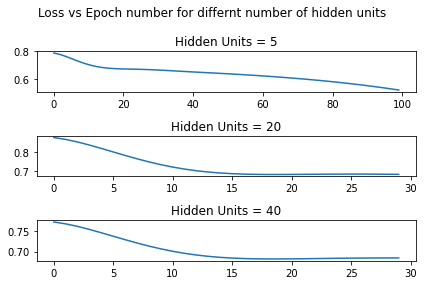

Minimum loss reached when using 5 hidden units was: 0.5195446762125034
Minimum loss reached when using 20 hidden units was: 0.6793432595247653
Minimum loss reached when using 40 hidden units was: 0.6819041904274411


In [21]:

df = pd.read_csv("train.csv", skiprows=0, header=0, na_values= "", dtype=str)
df_test = df = pd.read_csv("test.csv", skiprows=0, header=0, na_values= "", dtype=str)
df.head()

text_transformer = TfidfVectorizer()
x_train = text_transformer.fit_transform(df['Text'])
x_test = text_transformer.fit_transform(df_test['Text'])

y_train = df['Category']
y_test = df_test['Category']

nn_5 = MLPClassifier(hidden_layer_sizes=(1,5), activation='identity', solver='sgd', batch_size='auto', learning_rate='constant', max_iter=100, random_state=42, learning_rate_init=0.01)
nn_5.fit(x_train, y_train)

nn_20 = MLPClassifier(hidden_layer_sizes=(1,20), activation='identity', solver='sgd', batch_size='auto', learning_rate='constant', max_iter=100, random_state=42, learning_rate_init=0.01)
nn_20.fit(x_train, y_train)

nn_40 = MLPClassifier(hidden_layer_sizes=(1,40), activation='identity', solver='sgd', batch_size='auto', learning_rate='constant', max_iter=100, random_state=42, learning_rate_init=0.01)
nn_40.fit(x_train, y_train)


fig, axs = plt.subplots(3)
fig.suptitle('Loss vs Epoch number for differnt number of hidden units')

axs[0].set_title('Hidden Units = 5')
axs[0].plot([i for i in range(len(nn_5.loss_curve_))], nn_5.loss_curve_)

axs[1].set_title('Hidden Units = 20')
axs[1].plot([i for i in range(len(nn_20.loss_curve_))], nn_20.loss_curve_)

axs[2].set_title('Hidden Units = 40')
axs[2].plot([i for i in range(len(nn_40.loss_curve_))], nn_40.loss_curve_)
plt.tight_layout()
plt.show()


print("Minimum loss reached when using 5 hidden units was: {l}".format(l=nn_5.best_loss_))
print("Minimum loss reached when using 20 hidden units was: {l}".format(l=nn_20.best_loss_))
print("Minimum loss reached when using 40 hidden units was: {l}".format(l=nn_40.best_loss_))

## Task 3

In [11]:
trainDF = pd.read_csv("train.csv", skiprows=0, header=0, na_values= "", dtype=str)
testDF = pd.read_csv("test.csv", skiprows=0, header=0, na_values= "", dtype=str)

In [12]:
articles_text = trainDF["Text"].to_numpy()

#select 5 random articles for task 1
random_sample = random.sample(list(articles_text), 5)

## APPROACH ONE ##
vectorizer1 = CountVectorizer()
vectorizer1.fit(articles_text)

vectorizer1_sample = CountVectorizer()
vectorizer1_sample.fit(random_sample)

#Summary
#print(f'vector vocabulary - {vectorizer.vocabulary_}\n')

# encode document
vector1 = vectorizer1.transform(articles_text)
vector1_sample = vectorizer1_sample.transform(random_sample)

# summarize encoded vector
print("Method 1")
print(f'article vector\n {vector1.toarray()}')
print(f'\narticle vector (5 articles)\n {vector1_sample.toarray()}')

## APPROACH TWO ##
vectorizer2 = TfidfVectorizer()
vectorizer2.fit(articles_text)

vectorizer2_sample = TfidfVectorizer()
vectorizer2_sample.fit(random_sample)

#Summary
#print(f'vector vocabulary - {vectorizer.vocabulary_}\n')

# encode document
vector2 = vectorizer2.transform(articles_text)
vector2_sample = vectorizer2_sample.transform(random_sample)

# summarize encoded vector
print('\n', "Method 2")
print(f'article vector\n {vector2.toarray()}')
print(f'\narticle vector (5 articles)\n {vector2_sample.toarray()}')
print('\nArticles:', vector2.shape[0], ', Extracted Features:', vector2.shape[1])

Method 1
article vector
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

article vector (5 articles)
 [[1 1 0 ... 1 0 0]
 [1 0 1 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 1 0]]

 Method 2
article vector
 [[0.         0.02011467 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

article vector (5 articles)
 [[0.0142354  0.02526773 0.         ... 0.02526773 0.         0.        ]
 [0.03409148 0.         0.06051213 ... 0.         0.         0.06051213]
 [0.02921299 0.         0.         ... 0.         0.         0.        ]
 [0.     

In [14]:
from math import floor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

m = [0.1, 0.3, 0.5, 0.7, 0.9]
training_output = pd.DataFrame(columns=m)
testing_output = pd.DataFrame(columns=m)

NUM_ARTICLES = vector1.shape[0]

# Transform the data into a format that can be used by the classifier
text_transformer = TfidfVectorizer()
X_train_text = text_transformer.fit_transform(trainDF['Text'])
X_test_text = text_transformer.transform(testDF['Text'])

# LOGISTIC REGRESSION
training_accuracies = {}
testing_accuracies = {}
for m_value in m:
    TRAIN_LENGTH = floor(m_value * NUM_ARTICLES)
    # Test how differing sizes of training set data affect test/train accuracy
    X_train = X_train_text[0:TRAIN_LENGTH]  # First TRAIN_LENGTH articles
    Y_train = trainDF['Category'][0:TRAIN_LENGTH] # First TRAIN_LENGTH categories

    # Test Data Unchanged
    X_test = X_test_text    # All test data text
    Y_test = testDF['Category'] # All test data categories

    print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape) # Testing purposes

    # Train & Fit LR Model
    logreg = LogisticRegression(penalty='l2', solver='lbfgs', C=m_value, multi_class='multinomial')
    logreg.fit(X_train, Y_train)

    training_loss = log_loss(Y_train, logreg.predict_proba(X_train))
    testing_loss = log_loss(Y_test, logreg.predict_proba(X_test))

    # LR Model Accuracies
    training_accuracies[m_value] = training_loss
    testing_accuracies[m_value] = testing_loss

training_output = pd.concat(objs=[training_output, pd.DataFrame(training_accuracies, index=['LR'])])
testing_output = pd.concat(objs=[testing_output, pd.DataFrame(testing_accuracies, index=['LR'])])

# NAIVE BAYES
training_accuracies = {}
testing_accuracies = {}
for m_value in m:
    TRAIN_LENGTH = floor(m_value * NUM_ARTICLES)
    VECTOR_ARRAY = vector1.toarray() # change this to vector 2 if needed
    X_train = VECTOR_ARRAY[0:TRAIN_LENGTH]
    X_test = VECTOR_ARRAY[TRAIN_LENGTH:]
    Y_train = trainDF["Category"].to_list()[:TRAIN_LENGTH]
    Y_test = trainDF["Category"].to_list()[TRAIN_LENGTH:]

    # train your model here
    NB_clf = MultinomialNB()
    NB_clf.fit(X_train, Y_train)

    # put your accuracy calc here
    Y_train_pred = NB_clf.predict(X_train)
    Y_pred = NB_clf.predict(X_test)
    training_accuracies[m_value] = metrics.f1_score(Y_train, Y_train_pred, pos_label = "tech")
    testing_accuracies[m_value] = metrics.f1_score(Y_test, Y_pred, pos_label = "tech")
    
training_output = pd.concat(objs=[training_output, pd.DataFrame(training_accuracies, index=['NB'])])
testing_output = pd.concat(objs=[testing_output, pd.DataFrame(testing_accuracies, index=['NB'])])

# SVM
training_accuracies = {}
testing_accuracies = {}
for m_value in m:
    TRAIN_LENGTH = floor(m_value * NUM_ARTICLES)
    VECTOR_ARRAY = vector1.toarray() # change this to vector 2 if needed
    X_train = VECTOR_ARRAY[0:TRAIN_LENGTH]
    X_test = VECTOR_ARRAY[TRAIN_LENGTH:]
    Y_train = trainDF["Category"].to_list()[:TRAIN_LENGTH]
    Y_test = trainDF["Category"].to_list()[TRAIN_LENGTH:]

    # train your model here

    # put your accuracy calc here
    training_accuracies[m_value] = 0
    testing_accuracies[m_value] = 0
    
training_output = pd.concat(objs=[training_output, pd.DataFrame(training_accuracies, index=['SVM'])])
testing_output = pd.concat(objs=[testing_output, pd.DataFrame(testing_accuracies, index=['SVM'])])

# Not Nearest Neighbour (lol)
training_accuracies = {}
testing_accuracies = {}
for m_value in m:
    TRAIN_LENGTH = floor(m_value * NUM_ARTICLES)
    VECTOR_ARRAY = vector1.toarray() # change this to vector 2 if needed
    X_train = VECTOR_ARRAY[0:TRAIN_LENGTH]
    X_test = VECTOR_ARRAY[TRAIN_LENGTH:]
    Y_train = trainDF["Category"].to_list()[:TRAIN_LENGTH]
    Y_test = trainDF["Category"].to_list()[TRAIN_LENGTH:]

    # train your model here
    nn_sub = MLPClassifier(hidden_layer_sizes=(1,5), activation='identity', solver='sgd', batch_size='auto', learning_rate='constant', max_iter=100, random_state=42, learning_rate_init=0.01)
    nn_sub.fit(X_train, Y_train)
    
    y_pred = nn_sub.predict(X_test)
    testing_accuracies[m_value] = (f1_score(Y_test, y_pred, pos_label='tech'))

    y_pred_train = nn_sub.predict(X_train)
    training_accuracies[m_value] = f1_score(Y_train, y_pred_train, pos_label='tech')


    
training_output = pd.concat(objs=[training_output, pd.DataFrame(training_accuracies, index=['NN'])])
testing_output = pd.concat(objs=[testing_output, pd.DataFrame(testing_accuracies, index=['NN'])])

pd.merge(training_output, testing_output, left_index=True, right_index=True, suffixes=('_train', '_test'))

(42, 13518) (106, 13518) (42,) (106,)
(128, 13518) (106, 13518) (128,) (106,)
(214, 13518) (106, 13518) (214,) (106,)
(299, 13518) (106, 13518) (299,) (106,)
(385, 13518) (106, 13518) (385,) (106,)


,0.1_train,0.3_train,0.5_train,0.7_train,0.9_train,0.1_test,0.3_test,0.5_test,0.7_test,0.9_test
LR,0.617949,0.465043,0.348566,0.267723,0.213213,0.717488,0.52406,0.403188,0.31008,0.243248
NB,1.0,1.0,0.995434,0.996785,0.994819,0.884259,0.984026,0.985915,0.991736,1.0
SVM,0,0,0,0,0,0,0,0,0,0
NN,1.0,1.0,1.0,1.0,1.0,0.976623,0.970874,0.971963,0.975207,1.0


### 3b
In Q3(b), given models M=[m1, m2, m3] for respective chosen hyper-parameter C = [c1, c2, c3] for instance

perform k-fold CV on train.csv to derive 3 training accuracy (TrAcc) and 3 validation accuracy (TsAcc) as follows: TrAcc = [tr1, tr2, tr3], VaAcc = [va1, va2, va3].

for each hypter-parameter setting ci, perform classification on test.csv using mi to obtain testing accuracy tsi. 

Overall, we obtain TsAcc = [ts1, ts2, ts3] across three settings.

justify your hyper-parameter setting using TrAcc and VaAcc
summarize your observations on overfitting v.s. underfitting across models m1, m2, m3 using TrAcc and TsAcc


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline

X_train = trainDF["Text"]
Y_train = trainDF["Category"]
X_test = testDF["Text"]
Y_test = testDF["Category"]

# laplace smoothing hyperparameter
# alpha = 0.1
NB_m1 = make_pipeline(CountVectorizer(), MultinomialNB(alpha = 0.1))
# alpha = 1.0
NB_m2 = make_pipeline(CountVectorizer(), MultinomialNB(alpha = 1.0))
# alpha = 10.0
NB_m3 = make_pipeline(CountVectorizer(), MultinomialNB(alpha = 10.0))

cv_results_NB_m1 = cross_validate(NB_m1, X_train, Y_train, return_train_score=True)
cv_results_NB_m2 = cross_validate(NB_m2, X_train, Y_train, return_train_score=True)
cv_results_NB_m3 = cross_validate(NB_m3, X_train, Y_train, return_train_score=True)

NB_TrAcc = [cv_results_NB_m1['train_score'].mean(), cv_results_NB_m2['train_score'].mean(), cv_results_NB_m3['train_score'].mean()]
NB_VaAcc = [cv_results_NB_m1['test_score'].mean(), cv_results_NB_m2['test_score'].mean(), cv_results_NB_m3['test_score'].mean()]

print("Training accuracy:", NB_TrAcc, "\nValidation accuracy:", NB_VaAcc)



NB_m1.fit(X_train, Y_train)
Y_pred_m1 = NB_m1.predict(X_test)

NB_m2.fit(X_train, Y_train)
Y_pred_m2 = NB_m2.predict(X_test)

NB_m3.fit(X_train, Y_train)
Y_pred_m3 = NB_m3.predict(X_test)

NB_TsAcc = [metrics.accuracy_score(Y_test, Y_pred_m1), metrics.accuracy_score(Y_test, Y_pred_m2), metrics.accuracy_score(Y_test, Y_pred_m3)]
print("Testing accuracy", NB_TsAcc)


Training accuracy: [0.9976642285987076, 0.9964946379554329, 0.9883194380509096] 
Validation accuracy: [0.9836662106703147, 0.9836662106703147, 0.9557318741450068]
Testing accuracy [0.9811320754716981, 0.9716981132075472, 0.9716981132075472]


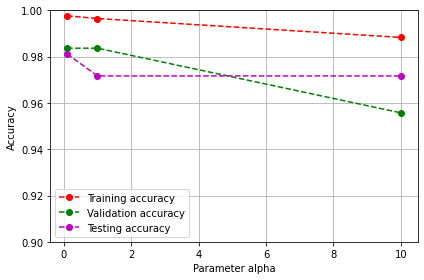

In [ ]:
x = [0.1, 1.0, 10.0]
plt.plot(x, NB_TrAcc, '--ro', label='Training accuracy')
plt.plot(x, NB_VaAcc, '--go', label='Validation accuracy')
plt.plot(x, NB_TsAcc, '--mo', label='Testing accuracy')
plt.legend()
plt.xlabel("Parameter alpha")
plt.ylabel("Accuracy")
plt.ylim([0.9, 1.0])
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline

NB_m1 = make_pipeline(CountVectorizer(), MultinomialNB(alpha = 1.0))
NB_m1.fit(trainDF["Text"], trainDF["Category"])
train_acc = NB_m1.score(trainDF["Text"], trainDF["Category"])
print(train_acc)

0.9953271028037384


Previous - Doesn't work

In [ ]:
from sklearn.model_selection import cross_validate

test_articles_text = testDF["Text"].to_numpy()

test_vectorizer1 = CountVectorizer()
test_vectorizer1.fit(test_articles_text)
test_vector1 = vectorizer1.transform(articles_text)
test_vector1 = test_vector1.toarray()

X_train = vector1
target_col = trainDF["Category"]
Y_train = target_col.to_numpy()

X_test = test_vector1
Y_test = testDF["Category"].to_numpy()

# laplace smoothing hyperparameter
# alpha = 0.5
NB_m1 = MultinomialNB(alpha = 0.5)
# alpha = 1.0
NB_m2 = MultinomialNB(alpha = 1.0)
# alpha = 1.5
NB_m3 = MultinomialNB(alpha = 1.5)

cv_results_NB_m1 = cross_validate(NB_m1, X_train, Y_train, return_train_score=True)
cv_results_NB_m2 = cross_validate(NB_m2, X_train, Y_train, return_train_score=True)
cv_results_NB_m3 = cross_validate(NB_m3, X_train, Y_train, return_train_score=True)

NB_TrAcc = [cv_results_NB_m1['train_score'].mean(), cv_results_NB_m2['train_score'].mean(), cv_results_NB_m3['train_score'].mean()]
NB_VaAcc = [cv_results_NB_m1['test_score'].mean(), cv_results_NB_m2['test_score'].mean(), cv_results_NB_m3['test_score'].mean()]

print("Training accuracy:", NB_TrAcc, "\nValidation accuracy:", NB_VaAcc)

NB_m1.fit(X_train, Y_train)
Y_pred_m1 = NB_m1.predict(X_test)

NB_m2.fit(X_train, Y_train)
Y_pred_m2 = NB_m2.predict(X_test)

NB_m3.fit(X_train, Y_train)
Y_pred_m3 = NB_m3.predict(X_test)

NB_TsAcc = [metrics.accuracy_score(Y_test, Y_pred_m1), metrics.accuracy_score(Y_test, Y_pred_m2), metrics.accuracy_score(Y_test, Y_pred_m3)]
print("Testing accuracy", NB_TsAcc)
